# Práctica 1.1 - NNs

Nombre 1: Guillermo Garcia Engelmo

Nombre 2: Antonio Serrano Rodriguez

Grupo: AP.12.04

### Preprocesado del dataset

In [24]:
# Librerías necesarias
import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Cargar el conjunto de datos de Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalizar los valores de las imágenes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Realizar la codificación one-hot de las etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Aplanar imagen
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

# Obtenemos el conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# Otras funciones necesarias
def plot(train, validation, title):
    '''función para mostrar  gráficas'''
    plt.clf()
    epochs = range(1, len(train) + 1)

    plt.plot(epochs, train, 'b-o', label='Training ' + title)
    plt.plot(epochs, validation, 'r--', label='Validation '+ title)

    plt.title('Training and validation ' + title)
    plt.xlabel('Epochs')
    plt.ylabel(title)
    plt.legend()
    plt.show()

def printModel(model, history):
    """Ver resultados"""
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Pérdida en el conjunto de prueba: {test_loss}')
    print(f'Precisión en el conjunto de prueba: {test_accuracy}')

    history_dict = history.history
    history_dict.keys()
    print(history.history.keys())  # Para confirmar las claves disponibles


    plot(history_dict['loss'], history_dict['val_loss'], 'loss')
    plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

### Modelo base: Estructura de capas y neuronas

En esta sección se define la arquitectura base de la red neuronal, formada únicamente por las capas y el número de neuronas. El objetivo de la estructura inicial es desarrollar una complejidad que permita al modelo llegar al sobreajuste __(overfitting)__. Este comportamiento es intencional, ya que establecerá el punto de partida para la aplicación de __técnicas de regularización__ en las secciones posteriores, buscando mejorar la capacidad de __generalización__ y reducir el sobreajuste.

Además, tras varios experimentos hemos considerado utilizar el optimizador __SGD__ con un tamaño de batch de 64 debido a su mejor rendimiento.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2633 - loss: 2.0425 - val_accuracy: 0.3692 - val_loss: 1.7905
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3792 - loss: 1.7698 - val_accuracy: 0.3860 - val_loss: 1.7089
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4088 - loss: 1.6726 - val_accuracy: 0.4045 - val_loss: 1.6585
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4261 - loss: 1.6250 - val_accuracy: 0.4382 - val_loss: 1.5865
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4482 - loss: 1.5670 - val_accuracy: 0.4465 - val_loss: 1.5602
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4622 - loss: 1.5251 - val_accuracy: 0.4562 - val_loss: 1.5408
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4701 - loss: 1.4960 - val_accuracy: 0.4500 - val_loss: 1.5609
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4810 - loss: 1.4648 - val_accuracy: 

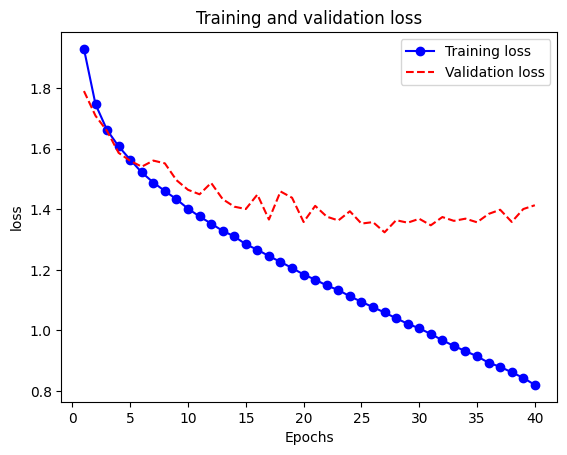

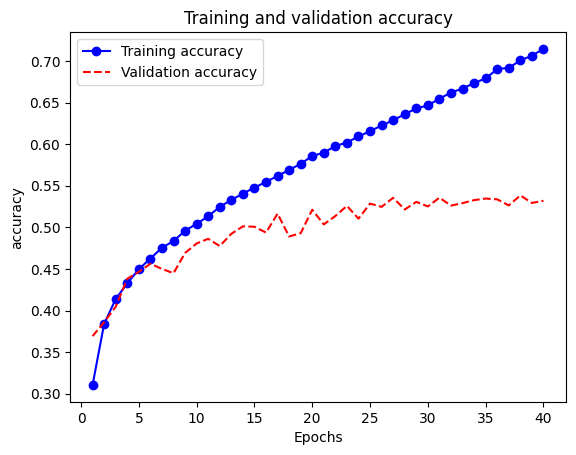

In [26]:
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=40, batch_size=64, validation_data=(x_val, y_val))

printModel(model, history)

## Regularizaciones


Dado que el modelo base muestra signos de sobreajuste (overfitting) en los datos de entrenamiento, en esta sección se introducen técnicas de regularización para mejorar la capacidad de generalización del modelo, que permite evitar que el modelo se ajuste demasiado a los datos de entrenamiento, aumentando su rendimiento en datos nuevos.

### 1. Dropout

En primer lugar hemos probado Dropout, para que durante el entrenamiento desactive de forma aleatoria un porcentaje de neuronas en las capas ocultas aplicadas y, de ese forma, evitar que dependa de forma excesiva de neuronas concretas para clasificar patrones.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1928 - loss: 2.1742 - val_accuracy: 0.3283 - val_loss: 1.8821
Epoch 2/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3181 - loss: 1.9015 - val_accuracy: 0.3635 - val_loss: 1.7859
Epoch 3/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3477 - loss: 1.8342 - val_accuracy: 0.3703 - val_loss: 1.7637
Epoch 4/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3673 - loss: 1.7684 - val_accuracy: 0.4027 - val_loss: 1.6734
Epoch 5/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3828 - loss: 1.7301 - val_accuracy: 0.4124 - val_loss: 1.6404
Epoch 6/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3941 - loss: 1.6977 - val_accuracy: 0.4113 - val_loss: 1.6368
Epoch 7/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4065 - loss: 1.6767 - val_accuracy: 0.4360 - val_loss: 1.6027
Epoch 8/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4121 - loss: 1.6411 - val_accuracy: 0.

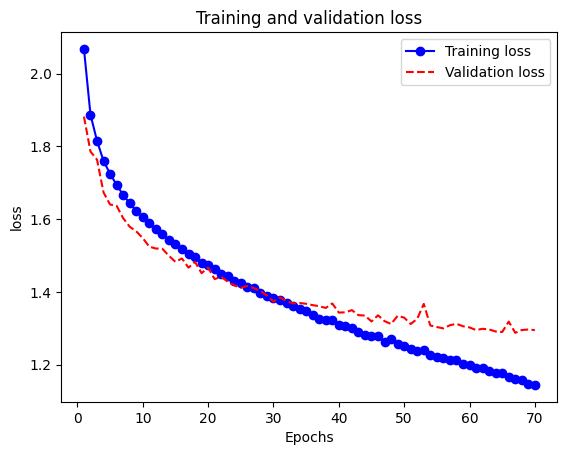

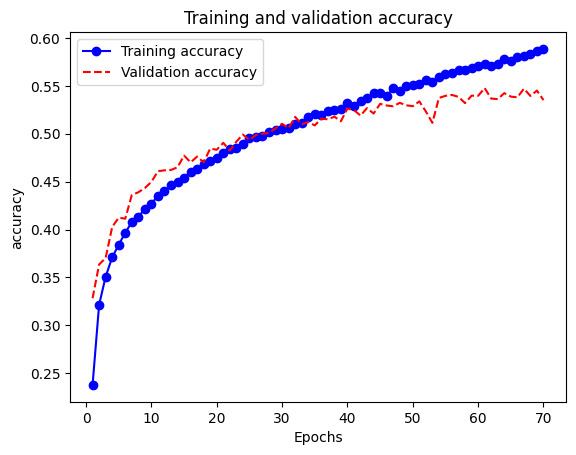

In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax')) 
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=70, batch_size=64, validation_data=(x_val, y_val))

printModel(model, history)

Tras probar varias configuraciones con Dropout, los mejores resultados los ha aportado este modelo, a partir del siguiente análisis:

Para la primera capa oculta usa un Dropout del 50% para reducir el sobreajuste por el gran número de neuronas, logrando una mejora estable en precisión y validación. La segunda capa oculta usa un 20%, suficiente para conservar información relevante, ya que Dropout con mayor procentaje afectaba la precisión sin mejorar la generalización. Y las capas finales no aplican dropout para mantener la estabilidad en la clasificación final. 

### 2. Regularizacion L1

Ahora exploraremos el comportamiento de L1 para mitigar el sobreajuste, ya que estamos trabajando con imágenes y puede haber áreas de la imagen que no nos interesen para clasificarlas.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2675 - loss: 17.6138 - val_accuracy: 0.3574 - val_loss: 15.0871
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3707 - loss: 14.3445 - val_accuracy: 0.3627 - val_loss: 12.2887
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4022 - loss: 11.5876 - val_accuracy: 0.4118 - val_loss: 9.7425
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4162 - loss: 9.1869 - val_accuracy: 0.4235 - val_loss: 7.6064
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4398 - loss: 7.1187 - val_accuracy: 0.4204 - val_loss: 5.8323
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4377 - loss: 5.4219 - val_accuracy: 0.4208 - val_loss: 4.3804
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4469 - loss: 4.0425 - val_accuracy: 0.4317 - val_loss: 3.2611
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4533 - loss: 3.0081 - val_accurac

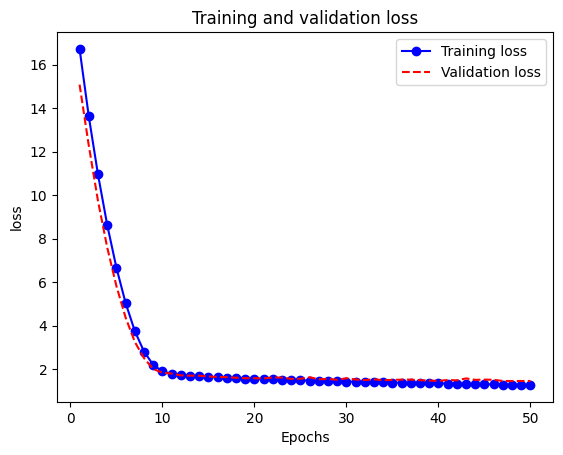

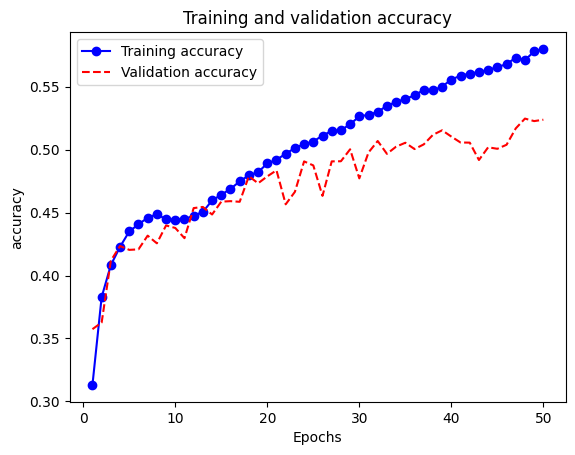

In [9]:
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dense(units=512,kernel_regularizer=keras.regularizers.l1(0.001), activation='relu'))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

printModel(model, history)

Esta configuación con L1 ha sido la única que nos ha aportado buenos resultados, después de haber probado con diferentes valores y en diferentes capas. Entendemos que su aplicación ejerce una gran impacto en el proceso de aprendizaje como hemos podido ver en los experimentos, llegando a la conclusión de que la causa puede ser debido a que el tamaño de la imagen es pequeño.

### 3. Regularizacion L2

En este apartado, aplicaremos regularización L2 para estudiar su efecto sobre el modelo base. A priori parece prometedor, ya que penaliza los pesos altos, ayudando a estabilizar el aprendizaje y a reducir la dependencia de ciertas neuronas sobre otras, mejorando asi la generalización del modelo.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.2645 - loss: 13.2087 - val_accuracy: 0.3491 - val_loss: 11.3037
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.3675 - loss: 10.8133 - val_accuracy: 0.3811 - val_loss: 9.4556
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.3947 - loss: 9.0637 - val_accuracy: 0.3971 - val_loss: 8.0131
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4125 - loss: 7.6958 - val_accuracy: 0.3915 - val_loss: 6.9220
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4252 - loss: 6.6452 - val_accuracy: 0.4186 - val_loss: 6.0061
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.4295 - loss: 5.8144 - val_accuracy: 0.4301 - val_loss: 5.3304
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4412 - loss: 5.1604 - val_accuracy: 0.4357 - val_loss: 4.7639
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4479 - loss: 4.6404

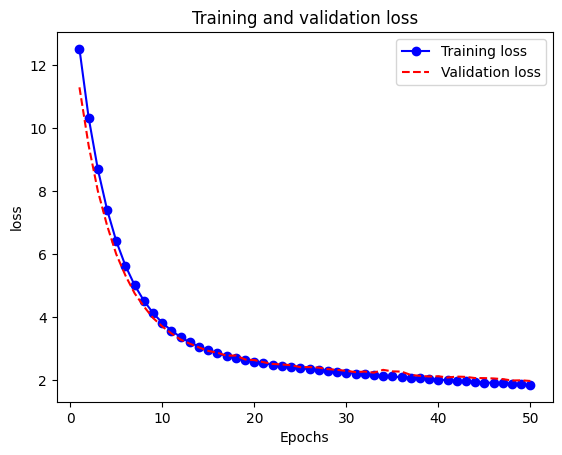

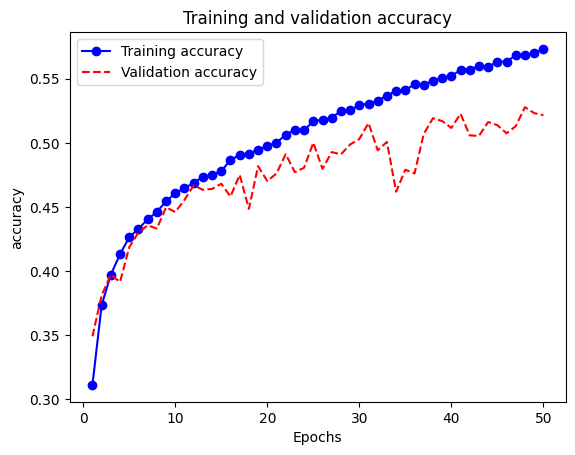

In [10]:
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(layers.Dense(units=1024,kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(units=512,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(units=256, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

printModel(model, history)

Después de haber hecho diferentes pruebas con L2, esta configuración ha sido la más exitosa. Para ello, ajusté valores de L2 para cada capa densa, notando cómo influían en la dinámica del aprendizaje. Inicialmente, evalué valores bajos de L2, los cuales resultaron insuficientes para frenar el sobreajuste en etapas avanzadas de entrenamiento. Sin embargo, al incrementar los valores en las capas intermedias, descubrimos que el modelo se mantenía estable y mejor preparado para generalizar en datos no vistos.

## Combinación de técnicas de regularizacion

### 1. Dropout + L2

Ahora ya habiendo probado diferentes técnicas de regularización por separado, combinaremos las técnicas de Dropout y regularización L2, ya que han sido las más eficaces, para buscar fortalecer la capacidad de generalización. En este caso, Dropout nos aporta robustez al modelo al "desactivar" aleatoriamente neuronas durante el entrenamiento, evitando que el modelo dependa de patrones específicos y promoviendo el uso de conexiones alternativas. Simultáneamente, la regularización L2 estabiliza el aprendizaje al penalizar pesos elevados, y complementando a Dropout a balancear la importancia entre las neuronas.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1868 - loss: 2.8577 - val_accuracy: 0.3320 - val_loss: 2.5407
Epoch 2/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3112 - loss: 2.5814 - val_accuracy: 0.3595 - val_loss: 2.4395
Epoch 3/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3447 - loss: 2.4781 - val_accuracy: 0.3791 - val_loss: 2.3776
Epoch 4/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3665 - loss: 2.4011 - val_accuracy: 0.3964 - val_loss: 2.3002
Epoch 5/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3803 - loss: 2.3455 - val_accuracy: 0.4049 - val_loss: 2.2687
Epoch 6/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3979 - loss: 2.2931 - val_accuracy: 0.4192 - val_loss: 2.2201
Epoch 7/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4064 - loss: 2.2553 - val_accuracy: 0.4305 - val_loss: 2.1741
Epoch 8/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4156 - loss: 2.2157 - val_accuracy: 0

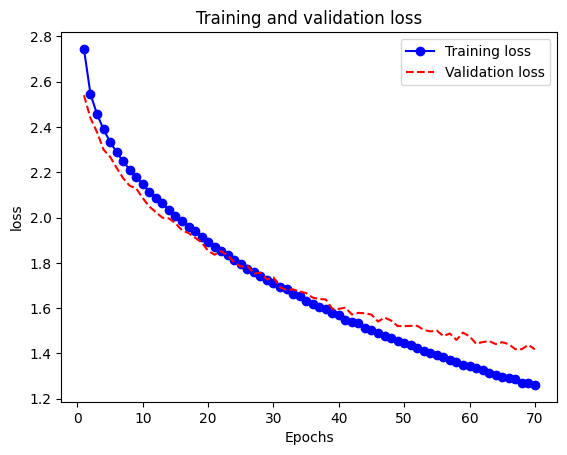

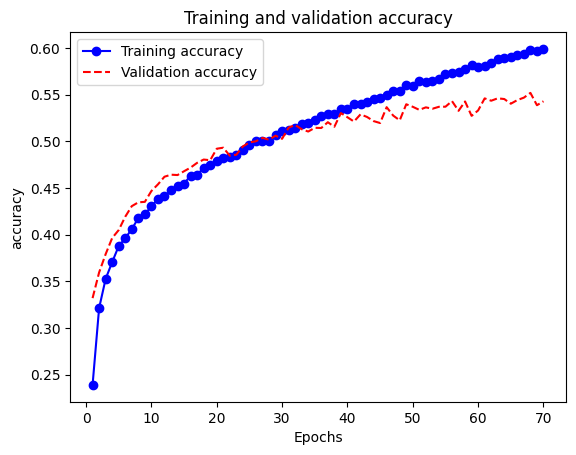

In [11]:
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=70, batch_size=64, validation_data=(x_val, y_val))

printModel(model, history)

Para la búsqueda de esta configuración, que fue la que mejores resultados nos ofrecía en los experimentos, optamos por implementar una tasa de Dropout del 0.5 en la primera capa oculta de 1024 neuronas, ya que esta capa contiene una cantidad significativa de parámetros y, por tanto, es especialmente vulnerable al sobreajuste. A continuación, añadimos un Dropout más moderado de 0.2 en la capa de 512 unidades, complementado con una regularización L2 de 0.001. Esta combinación permitió equilibrar la capacidad de aprendizaje del modelo en las capas superiores, limitando su complejidad de manera controlada. Finalmente, mantuvimos las siguientes capas sin regularización adicional para preservar su capacidad de representación, logrando un modelo estable y eficiente para generalizar sobre los datos de validación.

### 2. Dropout + l2 + batch normalizacion

Para intentar mejorar aun más la capacidad de generalización de nuestro modelo y reducir el sobreajuste, utilizaremos una combinación de Dropout, regularización L2 y Batch Normalization. Dropout fuerza al modelo a no depender de patrones específicos al desactivar neuronas de forma aleatoria, mientras que la regularización L2 penaliza los pesos elevados, ayudando a balancear la influencia de las neuronas. Batch Normalization, por su parte, normaliza las activaciones intermedias, estabilizando el proceso de entrenamiento y permitiendo tasas de aprendizaje más altas. Con esta combinación de técnicas, esperamos lograr un modelo más robusto y eficiente en la generalización de patrones complejos.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,807,498 (14.52 MB)

 Trainable params: 3,806,474 (14.52 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1833 - loss: 8.7983 - val_accuracy: 0.3256 - val_loss: 7.1891
Epoch 2/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2795 - loss: 7.0173 - val_accuracy: 0.3371 - val_loss: 5.9534
Epoch 3/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3303 - loss: 5.7766 - val_accuracy: 0.3909 - val_loss: 4.9409
Epoch 4/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3515 - loss: 4.8469 - val_accuracy: 0.4068 - val_loss: 4.1980
Epoch 5/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3751 - loss: 4.1267 - val_accuracy: 0.4271 - val_loss: 3.5862
Epoch 6/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3958 - loss: 3.5442 - val_accuracy: 0.4345 - val_loss: 3.1289
Epoch 7/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4101 - loss: 3.1076 - val_accuracy: 0.4535 - val_loss: 2.7428
Epoch 8/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4213 - loss: 2.7505 - val_accuracy: 0.

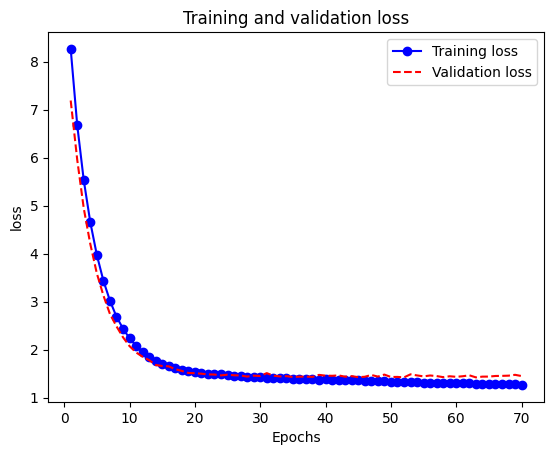

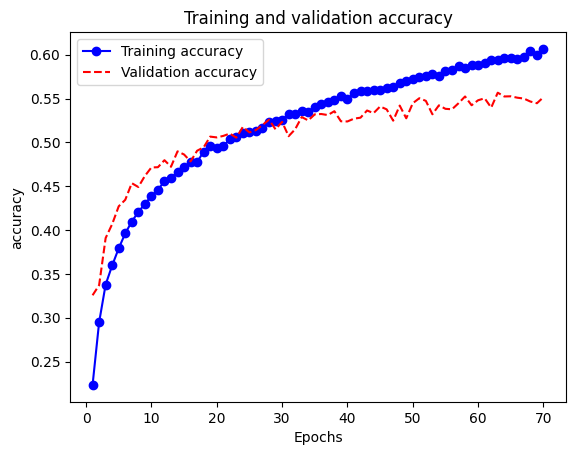

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=70, batch_size=64, validation_data=(x_val, y_val))

printModel(model, history)

Para esta configuración del modelo, hemos diseñado esta estructura:

En la primera capa de 1024 neuronas, aplicamos Dropout de 0.5, lo cual ayuda a reducir la dependencia de los parámetros de esta capa tan amplia y, así, previene el sobreajuste en etapas tempranas del aprendizaje. Para la siguiente capa, con 512 neuronas, utilizamos una regularización L2 de 0.01 junto con Batch Normalization. Esta decisión responde al comportamiento observado en pruebas previas, donde una regularización más intensa y la normalización resultaron en un aprendizaje más estable y con menor variabilidad en la precisión de validación. La capa de 256 neuronas tiene una tasa de Dropout más baja (0.2), lo que conserva su capacidad de representación sin comprometer la regularización.

__TAMBIEN CON DROPOUT, L2 Y BATCH NORMALIZATION PERO AUMENTANDO LA COMPLEJIDAD DEL MODELO AÑADIENDO UNA CAPA Y EARLYSTOPPING: no mejora al modelo anterior__

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,839,114 (14.65 MB)

 Trainable params: 3,838,090 (14.64 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1538 - loss: 8.8023 - val_accuracy: 0.2756 - val_loss: 7.3259
Epoch 2/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2538 - loss: 7.0554 - val_accuracy: 0.3360 - val_loss: 5.9954
Epoch 3/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3005 - loss: 5.8351 - val_accuracy: 0.3446 - val_loss: 5.0343
Epoch 4/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3261 - loss: 4.9041 - val_accuracy: 0.3770 - val_loss: 4.2508
Epoch 5/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3408 - loss: 4.1936 - val_accuracy: 0.3818 - val_loss: 3.7088
Epoch 6/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3562 - loss: 3.6461 - val_accuracy: 0.4060 - val_loss: 3.1846
Epoch 7/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3759 - loss: 3.1828 - val_accuracy: 0.4160 - val_loss: 2.8349
Epoch 8/150
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3891 - loss: 2.8450 - val_acc

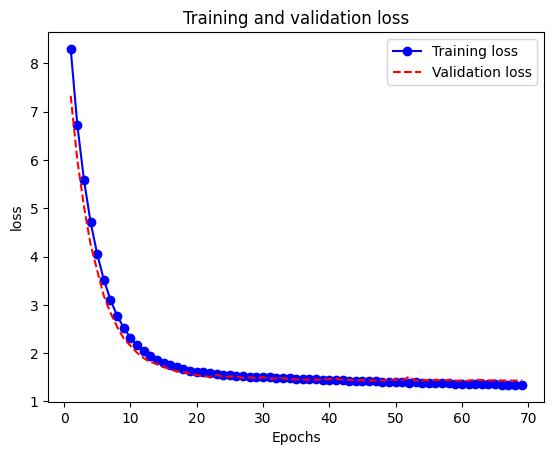

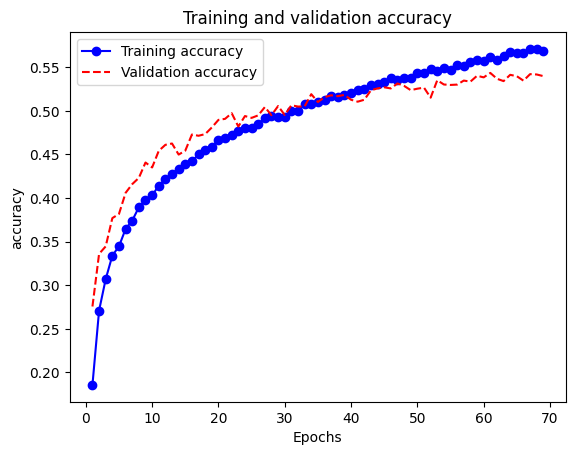

In [19]:
model = keras.Sequential()
# Capa de entrada
model.add(keras.Input(shape=(3072,)))
# Capas ocultas 
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(0.2))
# Capa de salida
model.add(layers.Dense(units=10, activation='softmax'))
# Mostrar modelo
model.summary()
# Introducir parámetros
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Definir los parámetros de early_stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=10
)
# Entrenar modelo
history = model.fit(x_train, y_train, epochs=150, batch_size=64, validation_data=(x_val, y_val), callbacks=[early_stopping])

printModel(model, history)

## Tabla de resultados

| Modelo       | train accuracy | train loss | val accuracy | val loss | test accuracy | test loss |
|--------------|----------------|------------|--------------|----------|---------------|-----------|
| Modelo base  |0.7151           | 0.8188      | 0.5319     | 1.4135  |0.5248          | 1.4002     |
| Dropout      |0.5922         | 1.1354      |0.5351       |1.2951    |0.5370         |1.2873     |
| L1           |0.5831       | 1.2738      |0.5238        |1.4628   |0.5126         |1.4573     |
| L2           | 0.5696         | 1.8633      | 0.5215       | 1.9840    |0.5285         |1.9269     |
|Dropout + L2  | 0.5988        | 1.2587     | 0.5428      |  1.4185   | 0.5471        |1.4092     |
|Dropout + L2 + Bat. |0.6081        |1.2562       |0.5516       | 1.4467     |0.5443       |1.4446       |

## Comentarios

__Modelo base:__ el rendimiento nos aporta que el modelo está sobreajustado a los datos de entrenamiento. Aunque se logra una precisión moderada en entrenamiento, el modelo no generaliza bien en los datos de validación y prueba.

__Dropout:__ parece haber reducido el sobreajuste inicial, ayudando al modelo a generalizar mejor. Aun así, la precisión es similar, sugiriendo que podría no ser suficiente por sí solo para una mejora significativa.

__L1:__ parece que su impacto en la precisión es menor que con Dropout, y no muestra una mejora significativa en generalización. Esto puede deberse a que la regularización es demasiado restrictiva, limitando la capacidad de representación del modelo.

__L2:__  no aporta una mejora clara en el rendimiento. Esto puede sugerir que, aunque se reduce el sobreajuste, la capacidad del modelo para aprender patrones útiles de los datos también se ha reducido.

__Dropout + L2:__ parece lograr un mejor balance entre capacidad de generalización y rendimiento. La combinación de ambas técnicas aporta un rendimiento más robusto en el conjunto de prueba, lo que sugiere que se ha alcanzado una estructura de regularización más efectiva, reduciendo el sobreajuste con cierta ganancia en generalización.

__Dropout + L2 + Batch:__ aporta un efecto estabilizador, permitiendo que el modelo aprenda de manera más consistente a lo largo de las épocas. Batch Normalization ayuda a reducir la sensibilidad a las inicializaciones de parámetros y a la elección de hiperparámetros. Esta configuración parece ser la más equilibrada, proporcionando la mejor generalización en los datos de prueba.

